

# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset I investigated for this project is a set of medical records for hospital appointments in Brazil. The data shows some features about the patients and whether or not they showed up to their appointments. The goal of the analysis is to find patterns that explain why patients show up or don't show up to appointments.
<ul>
 <li>'PatientId is the unique number given to a patient to Identify that patient</li> 
 <li>'AppointmentId' is the number assigned to a patient to identify each appointment</li>
 <li>'Gender' specifies if the patient is male or female</li> <li>'Age' tells how old the patient is </li>
<li>'ScheduledDay' informs us of the patient's scheduled appointment time and date</li>
<li>'Neighborhood' refers to the hospital's location</li> 
<li>'Scholarship' specifies whether or not the patient is registered in Brazil's Bolsa Famlia welfare program</li>
 <li>'Hipertension' indicates that the patient is hypertensive</li>
 <li>'Diabetes' indicates that the patient is diabetic</li>
 <li>'Alcoholism' indicates that the patient is addicted to alcohol</li> 
 <li>'Handcap' indicates that the patient has some disabilities</li>
 <li>'Sms_recieved' indicates that a message or no message was sent to the patient as a reminder about the appointment</li> <li>'No show' indicates if a patient showed up for appointment, it shows 'Yes' if a patient did not show up and 'No' if the patient showed up</li>
</ul>


### Question(s) for Analysis
<ul> 
    <li> What percentage of patients showed up for appointment? </li>
    <li> Is there one feature that absolutely influence a patient showing up to an appointment </li>
    <li> What gender show up more for appointment? </li>
    <li> Does Recieving SMS Reminder Influence a Patient to Show Up for Appointment? </li>
    <li> What neighbourhood hospital receive the most appointment?</li>
</ul>

In [2]:
# Import important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling





In [3]:
#load the no_show appointment dataset csv file into a dataframe named Patient_Apt

Patient_Apt = pd.read_csv ('noshowappointments-kagglev2-may-2016.csv')

In [4]:
#view the dataframe 

Patient_Apt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
Patient_Apt.shape

(110527, 14)

The code above shows that the dataframe consists of **110527 rows** and **14 columns**

In [6]:
Patient_Apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The code above shows the data type for all columns in the dataframe. 
<p> I observed that the patient_Id column has a datatype of float which I think the appropraite data type should be an integer. </p>
<p> I also observed that the scheduledDay and AppointmentDay has data type as object, which I think the appropraite data type for date is date-time </p>
<p> Thirdly, I observed some column names have some typo errors, columns such as 'handcap' should be 'handicap', 'hipertension' should be 'hypertension', ScheduledDay and AppointmentDay should have an underscore seperating both words like, 'schedule_day' 

In [7]:
Patient_Apt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The above code gives a statistical description of the dataframe. 
<P>It can be seen that the average age of a patient is 37, minimum age is -1 which I conclude to be an error and needs to be dropped as no person can be of age -1.</P> 
<P>The maximum age is 115.</P>
<P>25% of patients are around 18 years old and above, 50% of people are around the age of 37 years old, 75% of patients are around 55years old.</P>
<p>The minimum of scholarship, diabetes, alcoholism and sms_recieved is 0 and maximum is 1, while the minimum of handcap is 0 and the maximum is 4. According to this source on kaggle https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/32174?page=2 a maximum of 4 means the patient has visual, physical and other disability condititions</p>
   

In [8]:
Patient_Apt.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null values in the dataframe

In [9]:
repeating_rows = Patient_Apt.duplicated(). sum()
print (repeating_rows)

0


There are no duplicated rows in the dataframe


### Data Cleaning

 

From my observations in the previous section, I discovered some column names with typo errors and column names with no underscore to seperate both words for better interpretability.The first thing I am going to do in this section is to rename columns by correcting typographical errors in the column names. To do this, I created a user-defined function that takes in the old column names as input and output the renamed new columns. 

In [10]:
#user-defined function to rename column

def rename_column(df, old_columns, new_columns):
    if len(old_columns) !=len(new_columns):
        return print('Error!!! Number of old_columns must be equal to number of new_colums')
    else:
        for i in range(len(old_columns)):
            df.rename(columns = { old_columns[i] : new_columns[i] }, inplace = True)
        return df
    

In [11]:
#renaming columns if user-defined function is called
old_columns = ['ScheduledDay', 'PatientId', 'AppointmentDay', 'AppointmentID', 'Handcap', 'Hipertension', 'No-show']
new_columns = ['Scheduled_Day', 'Patient_Id', 'Appointment_Day', 'Appointment_ID', 'Handicap', 'Hypertension', 'No_show']
rename_column(Patient_Apt, old_columns, new_columns)


,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


 The above code is renaming the columns with typo errors;
<p>'PatientId' to 'Patient_Id'</p>
<p>'ScheduleDay' to 'schedule_Day</p>
<p>'AppointmentDay' to 'Appointment_Day'
<p>'Handcap' to 'Handicap'</p>
<p>'Hipertension' to 'Hypertension'</p>
<p>'No-show' to 'No_show'</p>

In [12]:
#convert scheduled_day column datatype from object to datetime
Patient_Apt['Scheduled_Day'] = pd.to_datetime(Patient_Apt['Scheduled_Day'])

From the previous section, it was observed  that the schedule_day datatype is object which is inappropraite. The code above is converting the datatype from object datatype to datetime datatype

In [13]:
#convert appointment_day column datatype from object to datetime
Patient_Apt['Appointment_Day'] = pd.to_datetime(Patient_Apt['Appointment_Day'])

From the previous section, it was observed  that the appointment_day datatype is object which is inappropraite. The code above is converting the datatype from object datatype to datetime datatype

In [14]:
#convert "Patient_Id" from float to integer
Patient_Apt = Patient_Apt.astype({'Patient_Id' : 'int'})

From the previous section, it was observed  that the patient_Id datatype is float which is inappropraite. The code above is converting the datatype from float datatype to integer datatype

In [15]:
#view all datatypes for columns in the dataframe
print (Patient_Apt.dtypes)

Patient_Id                  int64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No_show                    object
dtype: object


All the columns in the dataframe now have their appropraite data type

In [16]:
#rows with age less than 1
Patient_Apt[Patient_Apt.Age < 0]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


The above code brings out the row that has age less than 0 which is -1. I consider this an error and resolve that the row would be dropped. 

In [17]:
#dropping rows with age less than 1
Patient_Apt.drop(Patient_Apt[Patient_Apt['Age'] < 0]. index, inplace = True)

The code above code is deleting the row that has 'age' less than 0

In [18]:
#rows older than 100 years
Patient_Apt[Patient_Apt.Age > 100]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
58014,976294799775439,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,31963211613981,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
90372,234283596548,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,748234579244724,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


The above code shows rows that have age greater than 100. I resolve to drop rows with age 115 because this may result to outliers since the age range is too far off and it is rare to see people of that age.

In [19]:
#keeping rows with age less than 115
Patient_Apt = Patient_Apt[(Patient_Apt.Age < 115)]

The above code will keep only rows with ages less than 115

In [20]:
Patient_Apt.describe()

,Patient_Id,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see now that the minimum age is 0 (the patient could be babies that are not up to 1 year old) and the maximum age is 102 years old

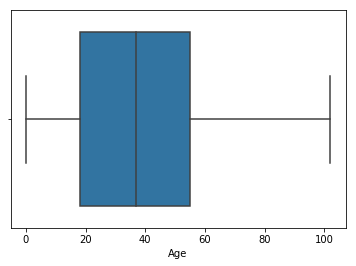

In [21]:
#using a boxplot to check for outliers in age
sns.boxplot(Patient_Apt.Age)
plt.show()

The boxplot is used to check if there is any outlier in the age column. As we can see, there is no outlier.

In [22]:
#change 'No' to 'showed' in the 'No_show' column
Patient_Apt.loc [Patient_Apt['No_show'] == 'No', 'No_show'] = 'Showed'

#change 'Yes' to 'Missed' in the 'No_show' column
Patient_Apt.loc [Patient_Apt['No_show'] == 'Yes', 'No_show'] = 'Missed'


In [23]:
#viewing the first 10 rows of the dataframe to see if the change has been effected in the 'No_show' column
Patient_Apt.head(10)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Showed
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Showed
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Missed
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Missed
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Showed
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Showed


The 'yes' and 'No' entries in the 'no_show' column can get a bit confusing. For a clearer picture and better understanding, I opted to change the *'No'* entry to *'Showed'* denoting patients that showed up to their appointments and *'Yes'* entry to *'Missed'* indicating those that didnt show up for their appointment.



<br> **Next, I'd be dropping columns that are not needed for this analysis** <br>

In [24]:
#dropping columns not needed for analysis
Patient_Apt.drop(['Patient_Id', 'Appointment_ID'], axis = 1, inplace = True)

In [25]:
Patient_Apt.head(3)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Showed


The column names 'Patient_iD' and 'Appointment_ID has been dropped because it will not be used for this analysis

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What Percentage of Patients Showed Up for Appointment

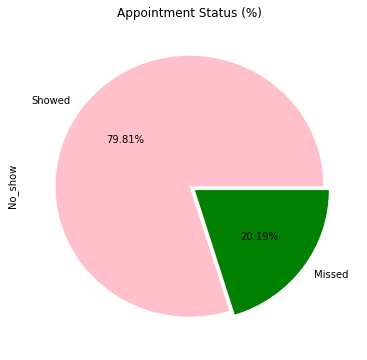

In [26]:
#plotting a piechart to show the percentage of patients that missed an appointment and those who showed up
Patient_Apt.No_show.value_counts().plot.pie(figsize=(6,6), colors = ['pink', 'green'], title = 'Appointment Status (%)', autopct='%.2f%%', explode=(0, .05))
plt.show()

The bar chart shows that about 78.81% of patients showed up for their appointment and 20.19% missed their appointment

### Research Question 2: Is there one feature that absolutely influence a patient  not showing up to an appointment

To answer research question 2, we will look at both categorical features and numerical features seperately to see if any of the features can absolutely influence a patient not showing up to an appointment.

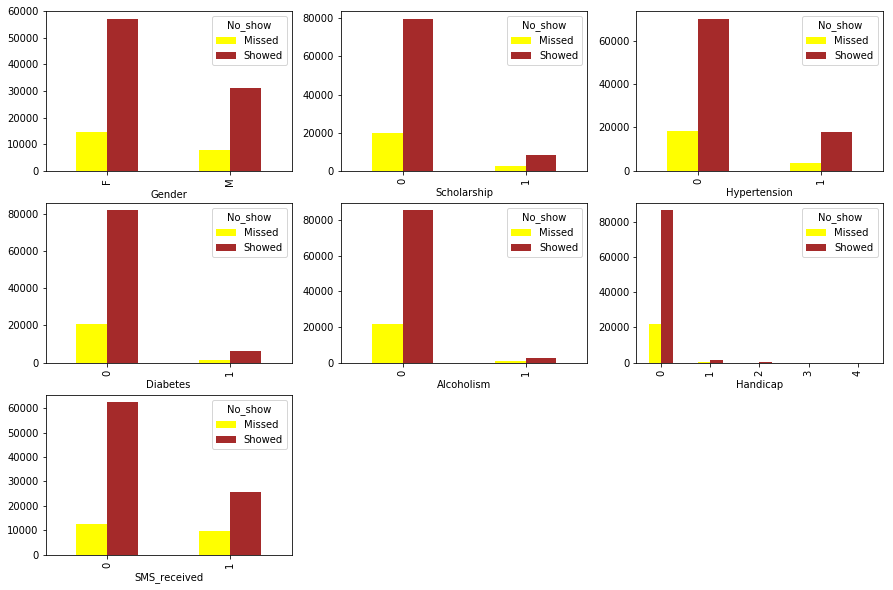

In [27]:
#storing all the categorical column in a variable named 'categorical features'
categorical_features = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

#for every feature in 'categorical_features', plot a bar chart grouped by the 'No_show' column
chart = plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    ax = chart.add_subplot(3, 3, i+1)
    colours = ['Yellow','Brown']
    Patient_Apt.groupby([feature, 'No_show'])[feature].count().unstack('No_show').plot(ax=ax, kind='bar', color=colours)

Looking at all the categorical features at a glance, the bars look the same. A lot of patients are not handicapped, hypertensive, diabetic or alcoholic. I conclude that there is no significant categorical features that can influence a patient from missing an appointment. 

<br>**Next, lets look at numerical variables**</br>

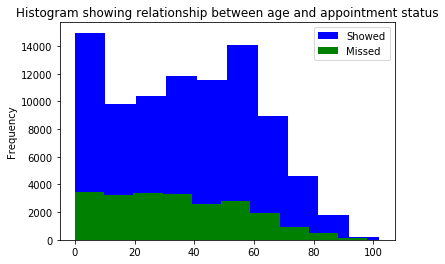

In [28]:
#declaring that the 'showed' and 'missed' entries in "No_show" column is equivalent to the variable name 'Showed' and 'Missed' respectively
Showed = (Patient_Apt.No_show == 'Showed')
Missed = (Patient_Apt.No_show == 'Missed')

#plotting a histogram showing the relationship between age and appointment status (showed or missed)
Patient_Apt[Showed].Age.plot(kind = 'hist', color = 'Blue')
Patient_Apt[Missed].Age.plot(kind = 'hist', color = 'Green')
plt.legend(['Showed', 'Missed'])
plt.title('Histogram showing relationship between age and appointment status')
plt.show()

The histogram above shows that age can affect whether patients show up to appointments or not. 
<p>We can see that from age 0 to about 3 years old (babies and infants) show up to appointments more. Then there is a decrease and then an increase at about age 50. Finally, there is subsequent decrease in appointment as the age gets older towards age 100.</p>  

### Research Question 3: What gender show up more for appointment?

In [29]:
#showing the number of patients that missed their appointment and those who showed up
Patient_Apt[["Gender", "No_show"]].groupby("No_show").count()

,Gender
No_show,
Missed,22316
Showed,88205


The code above is giving a total count of patients that showed up and those that missed their appointment. A total of 22316 missed their appointment and a total of 88205 patients showed up.

In [30]:
#showing the number of females that showed up and missed their appointment, also showing the number of males that showed/missed appointment
Patient_Apt.groupby('Gender').No_show.value_counts()

Gender  No_show
F       Showed     57243
        Missed     14591
M       Showed     30962
        Missed      7725
Name: No_show, dtype: int64

After getting the total count of patients that showed up and missed their appointment, the code above is grouping the number of patients that missed/ showed by gender. i.e how many males showed up and how many didn't? likewise, how many females showed up and how many didn't show up?

In [31]:
#getting rows of all female appointment and male appointment
female_appointment = len(Patient_Apt.loc[Patient_Apt['Gender'] == "F"])
male_appointment= len(Patient_Apt.loc[Patient_Apt['Gender'] == "M"])

The code above is getting all the entries of all females and males that have an appointment and storing it in the variable named 'female_appointment' and 'male_appointment' respectively

In [32]:
#getting rows of all female and male that missed their appointment
missedApt_female = len(Patient_Apt.query('No_show == "Missed" and Gender == "F"'))
missedApt_male = len(Patient_Apt.loc[(Patient_Apt['Gender'] == "M") & (Patient_Apt['No_show'] == "Missed")])

The code above is getting all the rows of females and males that missed their appointment and storing it in the variable named 'missedApt_female' and 'missedApt_male' respectively

In [33]:
#ratio of missed appointment to total appointment for female and male
ratio_female = int(round(missedApt_female/female_appointment*100))
ratio_male = int(round(missedApt_male/male_appointment*100))

The code above gives a ratio of the female appointment by dividing the number of missed appointment by total appointment and multiplying the number by 100.

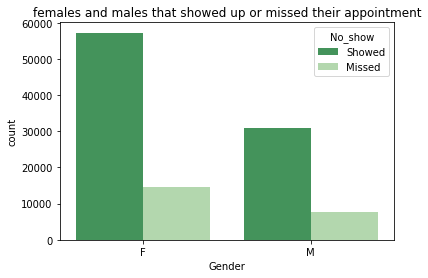

In [34]:
#plotting the graph of the number of females and males that showed up or missed their appointment

ax = sns.countplot(x=Patient_Apt.Gender, hue=Patient_Apt.No_show, data=Patient_Apt, palette = 'Greens_r')
ax.set_title("females and males that showed up or missed their appointment")
x_ticks_labels=['female', 'male']
plt.show();

**57,243 females** out of 71,834 showed up for their appointment and **14,591 females** missed their appointment
<br> **30,962 males** out of 38,687 showed up for their appointment and **7,725 males** missed their appointment </br>
   

### Research Question 4: Does Recieving SMS Reminder Influence a Patient to Show Up for Appointment?

In [35]:
#grouping the number of patients that recieved sms into show_up or missed and storing it in a variable named 'sms_reminder'
sms_reminder = Patient_Apt.groupby('SMS_received').No_show.value_counts()

In [36]:
#view the grouping of people that recieved sms
sms_reminder

SMS_received  No_show
0             Showed     62508
              Missed     12532
1             Showed     25697
              Missed      9784
Name: No_show, dtype: int64

Patients that did not recieve sms = 0 and Patients that recieved sms = 1


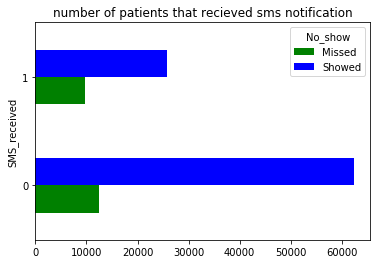

In [37]:
#creating a dictinary that translate 1 and 0 to 'received' and 'not recieved'
sms_status = {1:'received', 0:'Not received'}

#plotting a chart that shows the number of patients that recieved an sms reminder
sms_reminder = sms_reminder.unstack()
sms_reminder.plot(kind='barh', color = ['green', 'blue'], title = 'number of patients that recieved sms notification')
print ('Patients that did not recieve sms = 0 and Patients that recieved sms = 1' )

I thought to ask this question because an early sms reminder can help patients avoid missing their appointment. I considered it to be a major factor to influence a patient for showing up for appointment. 
<p> Surprisingly after the analysis from the plot above, we can see that patients that showed up more for their appointment did not recieve sms. Therefore receiving sms is not a major feature that influences if a patient will show up or not 

### Research Question 5: What Neigborhood Hospital Recieve the Most Appointment?

In [38]:
#getting only the number of patients that showed for appointment
showed_patients = Patient_Apt[Patient_Apt.No_show == 'Showed']

#getting the top 20 neigbourhood hospitals with high count of appointment
hospital_neigbourhood = showed_patients['Neighbourhood'].value_counts().index[:20]

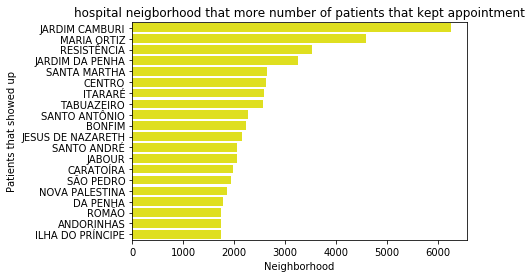

In [39]:
#plotting the number of patients that showed up to the neigborhood hospital
sns.countplot(data = showed_patients, y= 'Neighbourhood', color = 'Yellow', order = hospital_neigbourhood)
plt.xlabel('Neighborhood')
plt.ylabel('Patients that showed up')
plt.title ('hospital neigborhood that more number of patients that kept appointment')
plt.show();

I plotted a chart that shows the top 20 neigbourhood hospitals that receive the highest number of patients that showed up for appointment. From the above chart, the hospital at 'Jardim Camburi' has the highest number of appointments. They recieved about 6000 patients.

<a id='conclusions'></a>
## Conclusions

> **SUMMARY OF FINDINGS**: From the data analysis, it was discovered that age is an important factor that can influence a patient from not showing up to a medical appointment. This was seen as a decline in the number of people that showed up as the age increases towards 102 years old. This could be because older people get weary, too tired or even forget to keep to an appointment. Babies and infants (0- about 3years) showed to be the age group with more appointment. This might be because their immune system is still weak and they tend to visit the hospitals regularly. Another reason could be because infants are accompanied by a guardian/parent, so they tend to show up more. Other features such as being an alcoholic, neigborhood of the hospital, medical condition are not strong factors to detemine if a patient will show up for appointment or not. A great number of patients are not hypertensive, diabetic, alcholic and hadicapped.
<P>Another conclusion from the analysis is that females tend to show up more to medical appointments than males, probably because women are more health conscious than males.</P>
<P>Also, contrary to what was expected, there was no link between SMS received and No Shows. And, as always, it's important to remember that a link between two things does not mean that one caused the other.</P>

> **LIMITATION**: One limitation of this analysis was the interpretability of the 'No_show' column. It was very confusing mapping patients who showed up to be 'No' and those who didn't to be 'Yes'. To avoid mixing things up, I had to change 'Yes' to be 'Missed' and 'No' to be 'Showed_up'. 


> **SUGGESTION**: The dataset could have had a column that shows the distance from the patient's neigborhood to the hospital. It could have been helpful to see if the distance from the patient's home to the hospital is a factor that influence whether or not a patient would show up for an appointment.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0